In [1]:
import UsersAllocation
import pandas as pd

In [2]:
bs = pd.read_csv("./datasets/BS.csv")
#users = pd.read_csv("./datasets/Users.csv")

In [3]:
# Number of users to generate
totUsers = 10

# Getting max bs x and y
maxX, maxY = bs.x.max(), bs.y.max()

# IoT users percent (of totUsers)
iotUsersPercent = 0.8

userGenOrder = UsersAllocation.UserGenOrder.SHUFFLE

# Generating users in random locations
users = UsersAllocation.generateUsers(maxX, maxY, totUsers, iotUsersPercent, userGenOrder)

users.head(totUsers)

Generated 8 IoT users and 2 MMB users


,x,y,type
0,291.667198,143.915902,iot
1,27.505960,94.746347,iot
2,248.392863,6.294908,iot
3,161.159437,168.649197,iot
4,284.136805,258.216583,iot
5,234.607175,88.041610,mmb
6,210.082060,40.652475,iot
7,68.449511,198.981175,iot
8,190.147368,178.416487,iot
9,211.591340,5.716893,mmb


In [4]:
print('Max MMB user bit rate is', UsersAllocation.mmbUser.getMaxBitRate(), '[Mbit/s]')
print('Max IoT user bit rate is', UsersAllocation.iotUser.getMaxBitRate(), '[Mbit/s]')

Max MMB user bit rate is 18.052734375000004 [Mbit/s]
Max IoT user bit rate is 5.175117187500001 [Mbit/s]


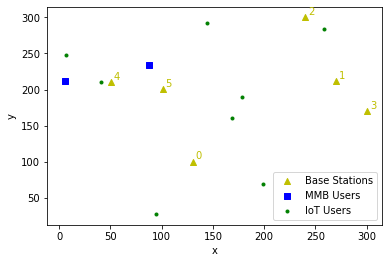

In [5]:
UsersAllocation.plotPositions(bs, users)

In [6]:
pathLosses = UsersAllocation.computePathLosses(bs, users)
    
pathLosses.head(totUsers*bs.shape[0])

,bsIdx,uIdx,type,pathLoss
0,0,0,iot,62.882290
1,1,0,iot,59.580940
2,2,0,iot,53.939631
3,3,0,iot,63.267292
4,4,0,iot,57.210935
5,5,0,iot,54.525068
6,0,1,iot,51.609744
7,1,1,iot,66.564881
8,2,1,iot,69.083736
9,3,1,iot,66.331997


In [7]:
minPathLossConn = UsersAllocation.computeMinPathLossesConnections(bs, pathLosses)

minPathLossConn.head(totUsers)        

,uIdx,bsIdx,type,pathLoss,bitRate
0,0,2,iot,53.939631,5
1,1,0,iot,51.609744,5
2,2,4,iot,47.316641,5
3,3,0,iot,50.115782,5
4,4,2,iot,35.878334,5
5,5,5,mmb,41.318698,18
6,6,4,iot,23.653739,5
7,7,0,iot,50.734917,5
8,8,5,iot,51.186962,5
9,9,4,mmb,43.806207,18


In [8]:
bs.head(bs.shape[0])

,x,y,freePrb
0,100.10,130.33,22
1,212.33,270.11,25
2,300.26,240.21,23
3,170.41,300.20,25
4,210.16,50.11,14
5,200.20,100.80,15


Network bit rate is 76 [Mbit/s]
Users disconnected: 0.0 %


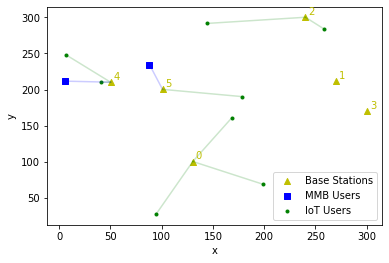

In [9]:
# Getting the network total bit rate
minPathLossBitRate = minPathLossConn.bitRate.sum()

# Getting percentage of users non connected
usersDiscPercent = minPathLossConn[minPathLossConn.bsIdx.isnull()].shape[0] / totUsers * 100

print('Network bit rate is', minPathLossBitRate, '[Mbit/s]')
print('Users disconnected:', usersDiscPercent, '%')

# Plotting users/base stations and related minimum path loss connection
UsersAllocation.plotPositions(bs, users, minPathLossConn)

In [10]:
geneticAllocation = UsersAllocation.GeneticAllocation(bs, users)

geneticAllocation.generatePopulation(100)

print(geneticAllocation.population)

individual_index: 0 ; bs_index: 2
individual_index: 0 ; bs_index: 2
individual_index: 0 ; bs_index: 5
individual_index: 0 ; bs_index: 2
individual_index: 0 ; bs_index: 5
individual_index: 0 ; bs_index: 4
individual_index: 0 ; bs_index: 5
individual_index: 0 ; bs_index: 0
individual_index: 0 ; bs_index: 1
individual_index: 0 ; bs_index: 4
individual_index: 1 ; bs_index: 1
individual_index: 1 ; bs_index: 5
individual_index: 1 ; bs_index: 4
individual_index: 1 ; bs_index: 4
individual_index: 1 ; bs_index: 5
individual_index: 1 ; bs_index: 5
individual_index: 1 ; bs_index: 0
individual_index: 1 ; bs_index: 4
individual_index: 1 ; bs_index: 4
individual_index: 1 ; bs_index: 5
individual_index: 2 ; bs_index: 2
individual_index: 2 ; bs_index: 0
individual_index: 2 ; bs_index: 4
individual_index: 2 ; bs_index: 3
individual_index: 2 ; bs_index: 2
individual_index: 2 ; bs_index: 3
individual_index: 2 ; bs_index: 3
individual_index: 2 ; bs_index: 5
individual_index: 2 ; bs_index: 4
individual_ind

individual_index: 28 ; bs_index: 5
individual_index: 28 ; bs_index: 2
individual_index: 28 ; bs_index: 3
individual_index: 28 ; bs_index: 0
individual_index: 28 ; bs_index: 0
individual_index: 28 ; bs_index: 0
individual_index: 28 ; bs_index: 4
individual_index: 29 ; bs_index: 2
individual_index: 29 ; bs_index: 2
individual_index: 29 ; bs_index: 3
individual_index: 29 ; bs_index: 2
individual_index: 29 ; bs_index: 0
individual_index: 29 ; bs_index: 4
individual_index: 29 ; bs_index: 5
individual_index: 29 ; bs_index: 1
individual_index: 29 ; bs_index: 5
individual_index: 29 ; bs_index: 2
individual_index: 30 ; bs_index: 2
individual_index: 30 ; bs_index: 0
individual_index: 30 ; bs_index: 0
individual_index: 30 ; bs_index: 5
individual_index: 30 ; bs_index: 2
individual_index: 30 ; bs_index: 4
individual_index: 30 ; bs_index: 4
individual_index: 30 ; bs_index: 5
individual_index: 30 ; bs_index: 1
individual_index: 30 ; bs_index: 3
individual_index: 31 ; bs_index: 4
individual_index: 31

individual_index: 54 ; bs_index: 3
individual_index: 55 ; bs_index: 1
individual_index: 55 ; bs_index: 1
individual_index: 55 ; bs_index: 2
individual_index: 55 ; bs_index: 2
individual_index: 55 ; bs_index: 0
individual_index: 55 ; bs_index: 0
individual_index: 55 ; bs_index: 3
individual_index: 55 ; bs_index: 4
individual_index: 55 ; bs_index: 4
individual_index: 55 ; bs_index: 2
individual_index: 56 ; bs_index: 5
individual_index: 56 ; bs_index: 1
individual_index: 56 ; bs_index: 3
individual_index: 56 ; bs_index: 1
individual_index: 56 ; bs_index: 3
individual_index: 56 ; bs_index: 4
individual_index: 56 ; bs_index: 4
individual_index: 56 ; bs_index: 0
individual_index: 56 ; bs_index: 2
individual_index: 56 ; bs_index: 5
individual_index: 57 ; bs_index: 5
individual_index: 57 ; bs_index: 4
individual_index: 57 ; bs_index: 1
individual_index: 57 ; bs_index: 4
individual_index: 57 ; bs_index: 1
individual_index: 57 ; bs_index: 4
individual_index: 57 ; bs_index: 3
individual_index: 57

individual_index: 79 ; bs_index: 0
individual_index: 79 ; bs_index: 2
individual_index: 79 ; bs_index: 3
individual_index: 79 ; bs_index: 4
individual_index: 80 ; bs_index: 1
individual_index: 80 ; bs_index: 4
individual_index: 80 ; bs_index: 2
individual_index: 80 ; bs_index: 5
individual_index: 80 ; bs_index: 2
individual_index: 80 ; bs_index: 2
individual_index: 80 ; bs_index: 0
individual_index: 80 ; bs_index: 1
individual_index: 80 ; bs_index: 1
individual_index: 80 ; bs_index: 5
individual_index: 81 ; bs_index: 0
individual_index: 81 ; bs_index: 5
individual_index: 81 ; bs_index: 4
individual_index: 81 ; bs_index: 2
individual_index: 81 ; bs_index: 2
individual_index: 81 ; bs_index: 1
individual_index: 81 ; bs_index: 0
individual_index: 81 ; bs_index: 3
individual_index: 81 ; bs_index: 0
individual_index: 81 ; bs_index: 1
individual_index: 82 ; bs_index: 2
individual_index: 82 ; bs_index: 0
individual_index: 82 ; bs_index: 0
individual_index: 82 ; bs_index: 3
individual_index: 82

In [11]:
first_best_fitness, second_best_fitness = geneticAllocation.fitness()

populatation size: 100
    tot_bit_rate  users_disc_percent
0      77.506406                 0.0
1      77.506406                 0.0
2      77.506406                 0.0
3      77.506406                 0.0
4      77.506406                 0.0
5      77.506406                 0.0
6      77.506406                 0.0
7      77.506406                 0.0
8      77.506406                 0.0
9      77.506406                 0.0
10     77.506406                 0.0
11     77.506406                 0.0
12     77.506406                 0.0
13     77.506406                 0.0
14     77.506406                 0.0
15     77.506406                 0.0
16     77.506406                 0.0
17     77.506406                 0.0
18     77.506406                 0.0
19     77.506406                 0.0
20     77.506406                 0.0
21     77.506406                 0.0
22     77.506406                 0.0
23     77.506406                 0.0
24     77.506406                 0.0
25     77.50640

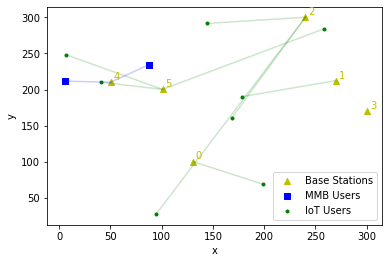

In [12]:
# Plotting users/base stations and related first best fitness solution
UsersAllocation.plotPositions(bs, users, first_best_fitness)

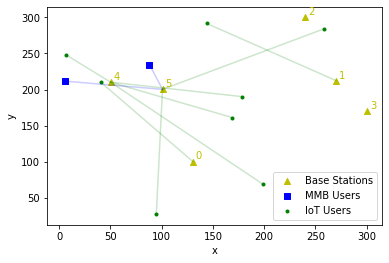

In [13]:
# Plotting users/base stations and related second best fitness solution
UsersAllocation.plotPositions(bs, users, second_best_fitness)